In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Housing.csv")  
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
print(df.shape)

(545, 13)


In [4]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [6]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


Features(x) and Targets(y)

In [8]:
X = df.drop('price', axis=1)
y = df['price']

Splitting data into train-test series (75% - training and 25% - testing)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Fitting Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predictions

In [11]:
y_pred = model.predict(X_test)

Evaluating

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 741796.3625460289
Mean Squared Error (MSE): 957922195423.4478
R² Score: 0.6439081148767712


Plotting Regression Line

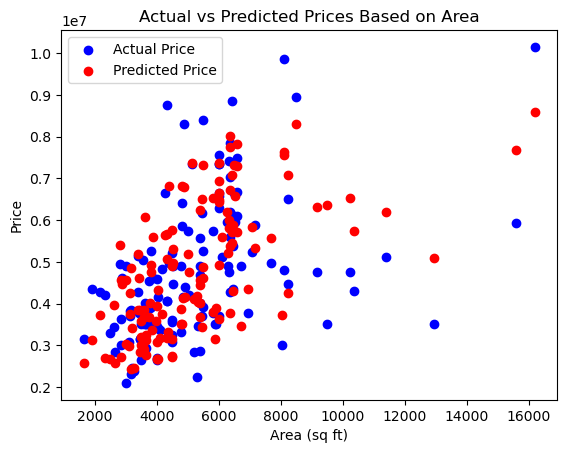

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_test['area'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['area'], model.predict(X_test), color='red', label='Predicted Price')

plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices Based on Area')
plt.legend()
plt.show()

In [14]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)

                            Feature    Coefficient
0                              area     264.951500
1                          bedrooms   73112.401331
2                         bathrooms  991313.686709
3                           stories  488691.874359
4                          mainroad  438983.499881
5                         guestroom  159859.241289
6                          basement  405276.381066
7                   hotwaterheating  933239.804925
8                   airconditioning  851064.304520
9                           parking  331192.645072
10                         prefarea  698038.689581
11  furnishingstatus_semi-furnished  -37794.786590
12     furnishingstatus_unfurnished -394518.078597


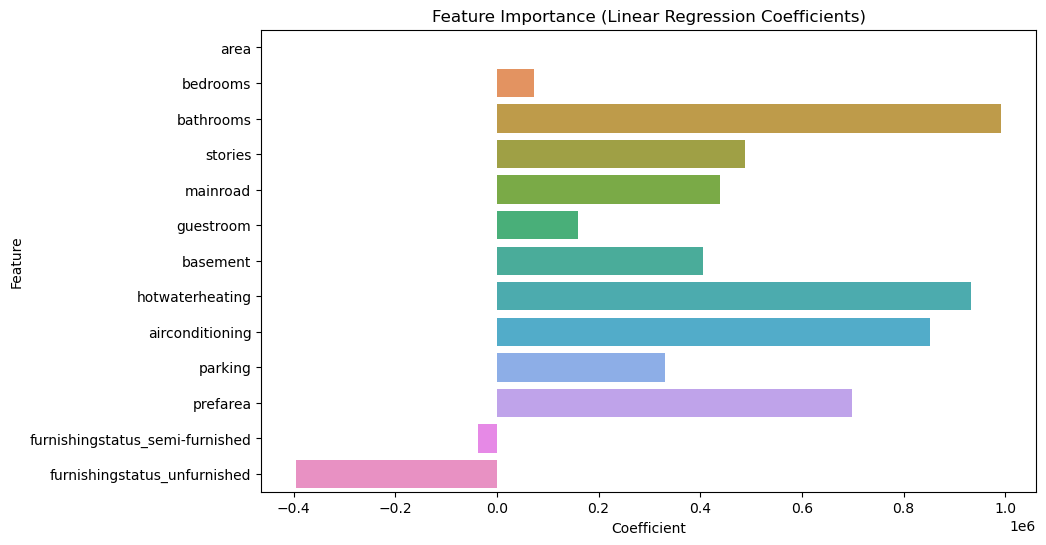

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()